In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.feature_map import ChebPQC
from squlearn.expectation_operator import SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import Adam

In [2]:
executor = Executor("statevector_simulator")

Define parameterized quantum circuit $Q(x,\theta)$

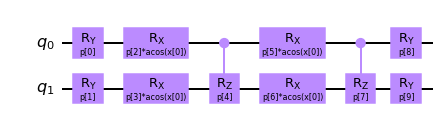

In [3]:
nqubits = 2
pqc = ChebPQC(num_qubits=nqubits, num_features=1, num_layers=2)
pqc.draw()

Definition of the cost operator:
$\hat{H} = J \sum\limits_{i < j} Z_i Z_j + h\sum\limits_i Z_i + c$

In [4]:
op = SummedPaulis(2)
print(op)

SparsePauliOp(['II', 'IZ', 'ZI'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2])])


Example function: $log(x)$

In [5]:
x_space = np.arange(-0.5, 0.6, 0.1)
ref_values = np.square(x_space)

np.random.seed(13)
param_ini = np.random.rand(pqc.num_parameters)
param_op_ini = np.ones(op.num_parameters)

reg = QNNRegressor(pqc, op, executor, SquaredLoss(), Adam({"lr":0.1}), param_ini, param_op_ini)

Optimization of the regression

In [6]:
reg.fit(x_space, ref_values)

theta [0.77770241 0.23754122 0.82427853 0.9657492  0.97260111 0.45344925
 0.60904246 0.77552651 0.64161334 0.72201823 1.         1.
 1.        ]
Current value: 3.1574234434268873
theta [0.77770241 0.23754122 0.82427853 0.9657492  0.97260111 0.45344925
 0.60904246 0.77552651 0.64161334 0.72201823 1.         1.
 1.        ]
Grad length: 16.201510077854078
grad [-1.11504426 -1.29234082  4.15922153 -2.78467197 -3.83681428  5.77086431
 -0.72177487 -1.22630784  3.55182494 -0.64637157 -8.50578704  6.93199853
  7.14414841]
theta [0.8777024  0.33754121 0.72427854 1.06574919 1.07260111 0.35344925
 0.70904245 0.87552651 0.54161335 0.82201821 1.1        0.9
 0.9       ]
Current value: 0.36589969254421895
theta [0.8777024  0.33754121 0.72427854 1.06574919 1.07260111 0.35344925
 0.70904245 0.87552651 0.54161335 0.82201821 1.1        0.9
 0.9       ]
Grad length: 3.6826976777163547
grad [-1.05367254 -0.24917964 -0.52277904 -2.27789673  0.30133273 -1.0715219
 -1.97074404 -0.03661961 -0.31319691 -0.517

In [7]:
print("Result Param:", reg.param)
print("Result ParamOp:", reg.param_op)

Result Param: [1.65135232 0.66524017 0.94685078 0.96012197 1.07676122 0.50876202
 0.97004195 0.64628971 0.84914015 0.66567045]
Result ParamOp: [0.94664274 0.41717632 0.89088529]


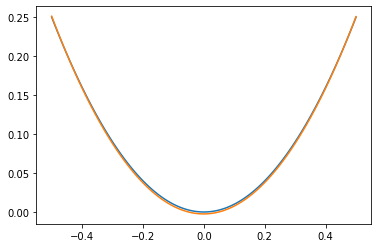

In [8]:
x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = reg.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Estimator
from qiskit_aer.noise import NoiseModel

service = QiskitRuntimeService(channel="ibm_quantum",token="1e1fcef3940bc7181262dbc135a052e83b17a669f187b1d6d7bde96ef3167078b55eb494f44f3b3de8ea934023da7a5eef3df4c6d27bf8ce7d48ca174c654cb7")
noisy_backend = service.get_backend('ibm_nairobi')
backend_noise_model = NoiseModel.from_backend(noisy_backend)
simulator = service.get_backend('ibmq_qasm_simulator')
session = Session(service,backend=simulator)

executor_backend = Executor(Estimator(session),caching=False)
qnn_backend = QNNRegressor(pqc, op, executor_backend, SquaredLoss(), Adam(), reg.param, reg.param_op, caching=False)

In [10]:
options = Options()
options.simulator = {
    "noise_model": backend_noise_model,
    "coupling_map": noisy_backend.configuration().coupling_map,
    "basis_gates": noisy_backend.configuration().basis_gates
}
options.execution.shots = 10000


C:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\src\squlearn\qnn\qnnr.py:136: UserWarning: The model is not fitted.
  warn("The model is not fitted.")


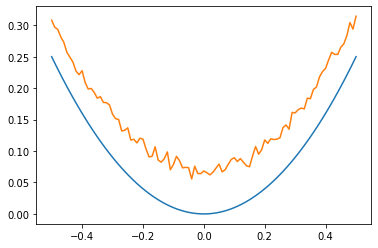

In [11]:
options.resilience_level = 0
options.optimization_level = 0

executor_backend.reset_options_estimator(options)

x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = qnn_backend.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

C:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\src\squlearn\qnn\qnnr.py:136: UserWarning: The model is not fitted.
  warn("The model is not fitted.")


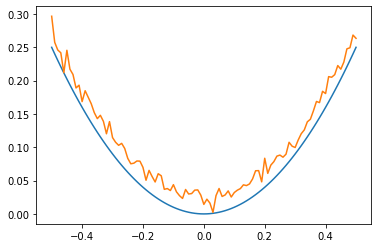

In [12]:
options.resilience_level = 1
options.optimization_level = 1

executor_backend.reset_options_estimator(options)

x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = qnn_backend.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

C:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\src\squlearn\qnn\qnnr.py:136: UserWarning: The model is not fitted.
  warn("The model is not fitted.")


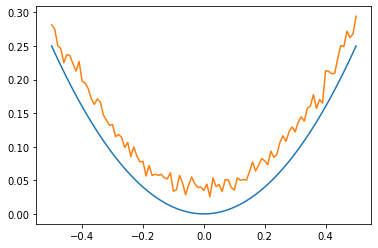

In [13]:
options.resilience_level = 1
options.optimization_level = 3

executor_backend.reset_options_estimator(options)

x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = qnn_backend.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

C:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\src\squlearn\qnn\qnnr.py:136: UserWarning: The model is not fitted.
  warn("The model is not fitted.")


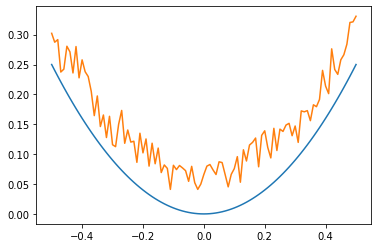

In [14]:
options.resilience_level = 2
options.optimization_level = 3

executor_backend.reset_options_estimator(options)

x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = qnn_backend.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

C:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\src\squlearn\qnn\qnnr.py:136: UserWarning: The model is not fitted.
  warn("The model is not fitted.")


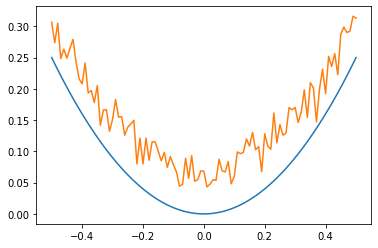

In [15]:
options.resilience_level = 3
options.optimization_level = 3

x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = qnn_backend.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

In [16]:
qnn_backend = QNNRegressor(pqc, op, executor_backend, SquaredLoss(), Adam({"lr":0.1}), param_ini, param_op_ini, variance=0.005, caching=True)

options.resilience_level = 0
options.optimization_level = 0

executor_backend.reset_options_estimator(options)

In [17]:
qnn_backend.fit(x_space, ref_values)

theta [0.77770241 0.23754122 0.82427853 0.9657492  0.97260111 0.45344925
 0.60904246 0.77552651 0.64161334 0.72201823 1.         1.
 1.        ]
Current value: 2.1651881014000005
theta [0.77770241 0.23754122 0.82427853 0.9657492  0.97260111 0.45344925
 0.60904246 0.77552651 0.64161334 0.72201823 1.         1.
 1.        ]
Grad length: 11.24494709167252
grad [-1.14480253 -1.05752708  2.43852943 -2.96140593 -2.48471684  3.40373447
 -1.439122   -0.90560594  2.2654409  -0.69503079 -5.942118    4.82179477
  4.94766269]
theta [0.8777024  0.33754121 0.72427854 1.06574919 1.07260111 0.35344925
 0.70904246 0.8755265  0.54161335 0.82201822 1.1        0.9
 0.9       ]
Current value: 0.574493075758893
theta [0.8777024  0.33754121 0.72427854 1.06574919 1.07260111 0.35344925
 0.70904246 0.8755265  0.54161335 0.82201822 1.1        0.9
 0.9       ]
Grad length: 5.599158976592896
grad [-1.11060287 -0.21099965 -1.50645694 -1.59296019  0.99317658 -2.44960514
 -1.92560893  0.35021273 -1.41641918 -0.326921